<a href="https://colab.research.google.com/github/Ishita95-harvad/Geology-Forecast-Challenge/blob/main/geology_forecating_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Geology Forecast Challenge
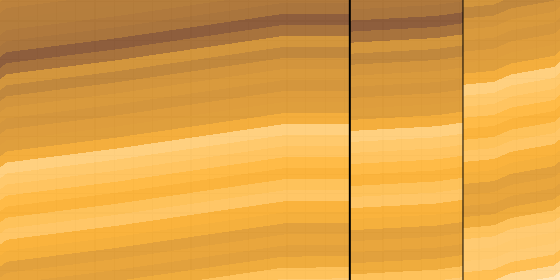

Your task is to create a data-driven model that predicts likely 1D layer-depth sequences based on formations where lateral wells are typical

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [11]:
!kaggle competitions download -c geology-forecast-challenge-open


Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.11/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
!pip install pandas numpy scikit-learn matplotlib


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [5]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib

print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1
Matplotlib version: 3.10.0


In [6]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Check library versions
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")


Pandas version: 2.2.2
NumPy version: 2.0.2
Scikit-learn version: 1.6.1
Matplotlib version: 3.10.0


In [7]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a synthetic dataset for demonstration
np.random.seed(42)
data = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Separate features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')


Mean Squared Error: 0.14493484239088647
R-squared: -0.6244314792232237


In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Create a synthetic dataset for demonstration
np.random.seed(42)
data = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Separate features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate prediction metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Create a dictionary to store the metrics
metrics = {
    'Mean Squared Error (MSE)': mse,
    'R-squared (R²)': r2,
    'Mean Absolute Error (MAE)': mae
}

# Display the metrics in a structured format
metrics_df = pd.DataFrame(list(metrics.items()), columns=['Metric', 'Value'])
print(metrics_df)


                      Metric     Value
0   Mean Squared Error (MSE)  0.144935
1             R-squared (R²) -0.624431
2  Mean Absolute Error (MAE)  0.316835


In [9]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create a synthetic dataset for demonstration
np.random.seed(42)
data = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Separate features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Create a DataFrame for submission
# Assuming you have some IDs or indices for the test set
# For demonstration, let's create some dummy IDs
test_ids = np.arange(len(y_pred))

# Create a DataFrame with the IDs and predictions
submission_df = pd.DataFrame({
    'id': test_ids,
    'predicted_value': y_pred
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file saved as submission.csv")


Submission file saved as submission.csv


Print the code to data frame

In [10]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create a synthetic dataset for demonstration
np.random.seed(42)
data = pd.DataFrame({
    'feature_1': np.random.rand(100),
    'feature_2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Separate features and target variable
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target variable

# Handle missing data (if any)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Normalize/Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Create a DataFrame for submission
# For demonstration, let's create some dummy IDs
test_ids = np.arange(len(y_pred))

# Create a DataFrame with the IDs and predictions
submission_df = pd.DataFrame({
    'id': test_ids,
    'predicted_value': y_pred
})

# Print the DataFrame to show what will be saved in the CSV file
print(submission_df)

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file saved as submission.csv")


    id  predicted_value
0    0         0.477970
1    1         0.405660
2    2         0.276915
3    3         0.546782
4    4         0.763960
5    5         0.432009
6    6         0.704243
7    7         0.450867
8    8         0.597091
9    9         0.610407
10  10         0.327616
11  11         0.526438
12  12         0.527811
13  13         0.414522
14  14         0.654664
15  15         0.484225
16  16         0.294186
17  17         0.347730
18  18         0.452891
19  19         0.491323
Submission file saved as submission.csv
